In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
data_i = pd.ExcelFile('temp2.xlsx')

In [3]:
data_img = pd.read_excel(data_i) 

In [4]:
data0 = data_img[0:400] 
data2 = data_img[400:500]
data1 = data_img[500:900] 
data3 = data_img[900:1000]
data4 = data_img[1000:1400] 
data5 = data_img[1400:1500]
data6 = data_img[1500:1900] 
data7 = data_img[1900:2000]
data8 = data_img[2000:2400] 
data9 = data_img[2400:2500]
data10 = data_img[2500:2900]
data11 = data_img[2900:3000]
data12 = data_img[3000:3400]
data13 = data_img[3400:3500]
data14 = data_img[3500:3900]
data15 = data_img[3900:4000]
data16 = data_img[4000:4400]
data17= data_img[4400:4500]
data18 = data_img[4500:4900]
data19 = data_img[4900:5000]

data_training = pd.concat([data0 , data1 , data4 , data6 , data8 , data10 , data12 , data14 , data16 , data18],axis = 0)
data_testing = pd.concat([data2 , data3 , data5 , data7 , data9 , data11 , data13 , data15 , data17 , data19],axis = 0)
# data_challenge = data4.append(data5)
data_training = data_training.sample(frac=1)
data_testing = data_testing.sample(frac=1)

In [ ]:
global ly_neurons
input1=[0]
output1=[0]
a = 0
print("For the required output enter input = 784, hidden layers = 1, hidden layer neurons = 100 and output = 100")
print()
input1[0] = int(input("Enter no of inputs ="))
layers = int(input("Enter no of hidden layers = "))
ly_neurons = [0 for i in range(0,layers)]
for i in range(0,layers):
    ly_neurons[i] = int(input("Enter neurons in hidden layer{} = ".format(i)))
output1[0] = 10
ly_neurons = input1 + ly_neurons + output1
print(ly_neurons)

In [14]:
y_training = [0 for f in range(ly_neurons[-1])]
s_testing = [0 for f in range(1000)]
y_testing = [0 for f in range(1000)]
# s_challenge = [0 for f in range(200)]
# y_challenge = [0 for f in range(200)]
y = np.array(data_training.iloc[:,0])
y_test = np.array(data_testing.iloc[:,0])
y_actual_layer = [0 for i in range(10)]
y_actual_layer2 = [0 for i in range(10)]
y_actual_layer_test = [0 for i in range(10)]
error = [0 for i in range(21)]
error2 = [0 for i in range(21)]
global n 
n = 0.0000001 #LEARNING RATE

In [7]:
def init_weights(ly):
    w1 = []
    for i in range(0,len(ly)-1):
        a = [0 for j in range(0,ly[i+1])]
        for k in range(0,ly[i+1]):
            a[k]= np.random.uniform(-1,1,ly[i]+1)
        w1 = w1 + a
    return w1 

w = init_weights(ly_neurons)

In [8]:
def sigmoid(z):
    return (1.00/(1.00 + np.exp(-z)))
def sigmoid_derivative(s):
    return ((1-s)*s)

In [60]:
def relu(x):
  if x>=0 :
    return x
  else :
    return 0.01*x

def relu_derivative(x):
    if x<0 :
      return 0.01
    else :
      return x
    

In [61]:
def tan_derivative(s):
    return (1-(s*s))

In [9]:
def convert_to_outputvector(y_actual2,k2):
    y_output = [0 for i in range(0,ly_neurons[-1])]
    a = y_actual2[k2]
#     print("actual = {}".format(a))
    for i in range(0,ly_neurons[-1]):
        if i == a:
             y_output[i] = 1
        else:
             y_output[i] = 0
    return(y_output)

In [10]:
def hidden_error(outdelta,w4,h2_hidden):
  s = (list(map(list, zip(*w4))))
  dh = np.dot(s[:][1:],outdelta)
  delta = dh*h2_hidden
  return delta


In [11]:
def output_error(desired,calculated,h2_outer):
  delta = np.zeros(len(desired))
  for i in range(len(desired)):
    a = desired[i] - calculated[i]
    delta[i] = a*h2_outer[i]
  return delta

In [ ]:
w = init_weights(ly_neurons)
w1 = w[0:ly_neurons[1]]
w2 = w[ly_neurons[1]:]
error = [0 for f in range(500)]
h1_h = [0 for f in range(0,len(w1))]
h2_h = [0 for f in range(0,len(w1))]
h1_o = [0 for f in range(0,len(w2))]
y_training = [0 for f in range(0,len(w2))]
h2_o = [0 for f in range(0,len(w2))]
b = [1]
s_training_h = list()
s_testing_o = list()
# momemtum = np.array([0.5 for i in range(len(w1))])
momemtum = 0.005

error2 = [0 for f in range(500)]
# y_training_total = [0 for f in range(500)]
# y_actual_layer_total = [0 for f in range(500)]
y_testing_total = [0 for f in range(1000)]
y_actual_layer_test_total =  [0 for f in range(1000)]
h1_h_test = [0 for f in range(0,len(w1))]
h2_h_test = [0 for f in range(0,len(w1))]
h1_o_test = [0 for f in range(0,len(w2))]
y_testing = [0 for f in range(0,len(w2))]
h2_o_test = [0 for f in range(0,len(w2))]
b_test = [1]
s_testing_h_test = list()
s_testing_o_test = list()

for epoch in range(1000):
  data_training = data_training.sample(frac=1)
  data_testing = data_testing.sample(frac=1)
  print("epoch = {}".format(epoch))
  error_training = 0
  error_testing = 0
  for j in range(400):
    s_training_h = np.dot(w1,data_training.iloc[j,1:])
    for i in range(len(w1)):
      h1_h[i] = sigmoid(s_training_h[i])
      h2_h[i] = sigmoid_derivative(h1_h[i])
    if(len(h1_h) == ly_neurons[1]):
      h1_h = b + h1_h

    s_training_o = np.dot(w2,h1_h)
    for i in range(len(w2)):
      h1_o[i] = sigmoid(s_training_o[i])
      h2_o[i] = sigmoid_derivative(h1_o[i])
      if h1_o[i] > 0.75:
          y_training[i] = 1
      elif h1_o[i] < 0.30:
          y_training[i] = 0
    y_actual_layer = convert_to_outputvector(y,j)
    if y_training != y_actual_layer:
      error_training = error_training + 1
    # y_training_total[j] = y_training
    # y_actual_layer_total[j] = y_actual_layer
  error[epoch] = error_training/400
  print("error = {}".format(error[epoch]))

  for k in range(100):
    s_testing_h_test = np.dot(w1,data_testing.iloc[k,1:])
    for i in range(len(w1)):
      h1_h_test[i] = sigmoid(s_testing_h_test[i])
      h2_h_test[i] = sigmoid_derivative(h1_h_test[i])
    if(len(h1_h_test) == ly_neurons[1]):
      h1_h_test = b_test + h1_h_test
    s_testing_o_test = np.dot(w2,h1_h_test)
    for i in range(len(w2)):
      h1_o_test[i] = sigmoid(s_testing_o_test[i])
      h2_o_test[i] = sigmoid_derivative(h1_o_test[i])
      if h1_o_test[i] > 0.75:
          y_testing[i] = 1
      elif h1_o_test[i] < 0.30:
          y_testing[i] = 0
    y_actual_layer_test = convert_to_outputvector(y_test,k)
    if y_testing != y_actual_layer_test:
      error_testing= error_testing + 1
    y_testing_total[k] = np.argmax(y_testing)
    # y_actual_layer_test_total[k] = y_actual_layer_test  
 
  error2[epoch] = error_testing/100
  print("errortest = {}".format(error2[epoch]))



In [ ]:
w = init_weights(ly_neurons)
w1 = w[0:ly_neurons[1]]
w2 = w[ly_neurons[1]:]
error = [0 for f in range(5000)]
h1_h = [0 for f in range(0,len(w1))]
h2_h = [0 for f in range(0,len(w1))]
h1_o = [0 for f in range(0,len(w2))]
y_training = [0 for f in range(0,len(w2))]
h2_o = [0 for f in range(0,len(w2))]
b = [1]
s_training_h = list()
s_testing_o = list()
momemtum = 0.08

error2 = [0 for f in range(5000)]
y_training_total = [0 for f in range(4000)]
# y_actual_layer_total = [0 for f in range(500)]
y_testing_total = [0 for f in range(1000)]
y_actual_layer_test_total =  [0 for f in range(1000)]
h1_h_test = [0 for f in range(0,len(w1))]
h2_h_test = [0 for f in range(0,len(w1))]
h1_o_test = [0 for f in range(0,len(w2))]
y_testing = [0 for f in range(0,len(w2))]
h2_o_test = [0 for f in range(0,len(w2))]
b_test = [1]
s_testing_h_test = list()
s_testing_o_test = list()

for epoch in range(800):
  # data_training = data_training.sample(frac=1)
  # data_testing = data_testing.sample(frac=1)
  print("epoch = {}".format(epoch))
  error_training = 0
  error_testing = 0
  for j in range(4000):
    s_training_h = np.dot(w1,data_training.iloc[j,1:])
    for i in range(len(w1)):
      h1_h[i] = sigmoid(s_training_h[i])
      h2_h[i] = sigmoid_derivative(h1_h[i])
    if(len(h1_h) == ly_neurons[1]):
      h1_h = b + h1_h
    s_training_o = np.dot(w2,h1_h)
    for i in range(len(w2)):
      h1_o[i] = sigmoid(s_training_o[i])
      h2_o[i] = sigmoid_derivative(h1_o[i])
      if h1_o[i] > 0.75:
          y_training[i] = 1
      elif h1_o[i] < 0.30:
          y_training[i] = 0
    y_actual_layer = convert_to_outputvector(y,j)
    if y_training != y_actual_layer:
      error_training = error_training + 1
    y_training_total[j] = np.argmax(y_training)
    # y_actual_layer_total[j] = y_actual_layer
    delta_outputlayer = output_error(y_actual_layer,y_training,h2_o)
    delta_hiddenlayer = hidden_error(delta_outputlayer,w2,h2_h)
    z = data_training.iloc[j,1:]
    z = np.array(z)
    z = np.reshape(z,(1,785))
    g = np.array(delta_hiddenlayer)
    g = np.reshape(g,(100,1)) 

    z2 = np.array(h1_h)
    z2 = np.reshape(h1_h,(1,101))
    g2 = np.array(delta_outputlayer)
    g2 = np.reshape(g2,(10,1))

    # w1 = np.dot(g,z) + w1
    # w2 = np.dot(g2,z2) + w2
    w1 = np.dot(g,z) + np.dot(momemtum,w1)/10000 + w1
    w2 = np.dot(g2,z2)  + np.dot(momemtum,w2)/10000 + w2
  error[epoch] = error_training/4000
  print("error = {}".format(error[epoch]))

  for k in range(1000):
    s_testing_h_test = np.dot(w1,data_testing.iloc[k,1:])
    for i in range(len(w1)):
      h1_h_test[i] = sigmoid(s_testing_h_test[i])
      h2_h_test[i] = sigmoid_derivative(h1_h_test[i])
    if(len(h1_h_test) == ly_neurons[1]):
      h1_h_test = b_test + h1_h_test
    s_testing_o_test = np.dot(w2,h1_h_test)
    for i in range(len(w2)):
      h1_o_test[i] = sigmoid(s_testing_o_test[i])
      h2_o_test[i] = sigmoid_derivative(h1_o_test[i])
      if h1_o_test[i] > 0.75:
          y_testing[i] = 1
      elif h1_o_test[i] < 0.30:
          y_testing[i] = 0
    y_actual_layer_test = convert_to_outputvector(y_test,k)
    if y_testing != y_actual_layer_test:
      error_testing= error_testing + 1
    y_testing_total[k] = np.argmax(y_testing)
    # y_actual_layer_test_total[k] = y_actual_layer_test  
 
  error2[epoch] = error_testing/1000
  print("errortest = {}".format(error2[epoch]))


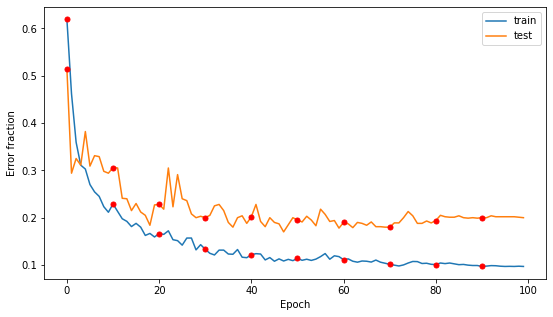

In [58]:
plt.figure(figsize=(9,5))
plt.plot(error[:100],label = "train")
plt.plot(error2[:100],label = "test")
for i in range(0,100,10):
  plt.plot(i,error[i],marker='o', markersize=5, markerfacecolor= 'red', markeredgecolor = 'red')
for i in range(0,100,10):
  plt.plot(i,error2[i], marker='o', markersize=5, markerfacecolor= 'red', markeredgecolor = 'red')
plt.xlabel("Epoch")
plt.ylabel("Error fraction")
plt.legend()
plt.show()

In [19]:
confusion_matrix(y_test,y_testing_total)

array([[99,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 96,  0,  2,  0,  2,  0,  0,  0,  0],
       [ 4,  3, 84,  0,  3,  0,  0,  3,  3,  0],
       [ 3,  2,  4, 82,  1,  2,  0,  2,  3,  1],
       [ 2,  0,  0,  0, 96,  0,  2,  0,  0,  0],
       [ 5,  1,  0,  1,  1, 89,  2,  0,  0,  1],
       [10,  0,  1,  0,  0,  2, 86,  0,  1,  0],
       [ 2,  2,  0,  1,  1,  0,  0, 93,  0,  1],
       [ 8,  3,  0,  3,  3,  2,  2,  5, 72,  2],
       [ 2,  1,  1,  1, 18,  0,  0, 12,  3, 62]])

In [20]:
confusion_matrix(y,y_training_total)

array([[398,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  2, 395,   1,   0,   1,   1,   0,   0,   0,   0],
       [ 20,   1, 363,   1,   2,   1,   3,   7,   2,   0],
       [ 10,   1,   8, 366,   1,   3,   1,   7,   2,   1],
       [  9,   0,   0,   0, 388,   0,   0,   0,   0,   3],
       [ 20,   0,   1,   7,   1, 362,   3,   2,   1,   3],
       [  6,   1,   1,   0,   6,   2, 380,   1,   3,   0],
       [ 13,   2,   4,   1,   4,   0,   0, 375,   0,   1],
       [ 12,   1,   1,   6,   4,   5,   3,   3, 362,   3],
       [ 14,   4,   0,   4,  18,   1,   0,  19,  15, 325]])